# Census Income Data Set

## **Table of Content**


### **1. Introduction**
     1.1 Data Description
     1.2 Features Description
     1.3 Objective of this project
  

### **2. Fetching Data**
    2.1 Import packages
    2.2 Import data


### **3. Data Cleaning**

### **4. Summary**
    4.1 Summary statistics for numeric attribute
    4.2 Summary and count for categorical attribute

### **5. EDA**
#### 5.1.Univariate analysis
    histograms and count plots for all single variables
#### 5.2.Bivariate analysis
    relationship with income for all variables            
#### 5.3.Multivariate analysis
    5.3.1 Correlation among the numeric variables.
    5.3.2 Multivariate analysis between "income", "age", "gender"
    5.3.3 Multivariate Analysis between "income", "hours-per-week", "gender"

   
### **6. Conclusion of Complete EDA**

# 1. Introduction:

A census is the procedure of systematically acquiring and recording information about the members of a given population.
The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

## 1.1  Data description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  The prediction task is to determine whether a person makes over $50K a year.

## 1.2 Features Description

**1. Categorical Attributes**
 * **workclass**:  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  -  Individual work category  
 * **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  -  Individual's highest education degree  
 * **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  -  Individual marital status  
 * **occupation**:  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  -  Individual's occupation  
 * **relationship**:  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  -  Individual's relation in a family   
 * ** race**:  White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  -  Race of Individual   
 * **sex**:  Female, Male.
 * **native-country**:  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
  -  Individual's native country   

**2. Continuous Attributes**
 * **age**: continuous.
  -  Age of an individual  
 * **capital-gain**: continuous.
 * **capital-loss**: continuous.
 * **hours-per-week**: continuous.
  -  Individual's working hour per week   

## 1.3 Objective of this project

The goal of this eda project is to understand the attributes whether a person makes over 50K a year or not given their demographic variation. This is a classification problem.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df=pd.read_csv("adult.csv")
#df.drop("fnlwgt",axis=1)

In [3]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   occupation       48842 non-null  object
 6   relationship     48842 non-null  object
 7   race             48842 non-null  object
 8   gender           48842 non-null  object
 9   capital-gain     48842 non-null  int64 
 10  capital-loss     48842 non-null  int64 
 11  hours-per-week   48842 non-null  int64 
 12  native-country   48842 non-null  object
 13  income           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


## Missing Values Check

In [5]:
100*df.isnull().mean()

age                0.0
workclass          0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [7]:
df.shape

(48842, 14)

In [6]:
for i in df.columns:
    print(i,df[i].nunique())

age 74
workclass 9
education 16
educational-num 16
marital-status 7
occupation 15
relationship 6
race 5
gender 2
capital-gain 123
capital-loss 99
hours-per-week 96
native-country 42
income 2


In [10]:
cont_cols=["age","capital-gain","capital-loss","hours-per-week"]
cat_cols=["workclass","education","educational-num","marital-status","occupation","relationship",\
         "race","gender","income","native-country"]
len(cont_cols)+len(cat_cols)

14

In [11]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts(normalize=True))
#workclass,occupation,native-country

workclass
Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
?                   0.057307
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64
education
HS-grad         0.323164
Some-college    0.222718
Bachelors       0.164305
Masters         0.054400
Assoc-voc       0.042197
11th            0.037099
Assoc-acdm      0.032779
10th            0.028439
7th-8th         0.019553
Prof-school     0.017075
9th             0.015478
12th            0.013452
Doctorate       0.012162
5th-6th         0.010421
1st-4th         0.005057
Preschool       0.001699
Name: education, dtype: float64
educational-num
9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
7     0.037099
12    0.032779
6     0.028439
4     0.019553
15    0.017075
5     0.015478
8     0.013452
16    0.012162
3     0.010421
2     0.005057
1     0.001699

In [24]:
df[df["workclass"]=="?"].shape[0]/df.shape[0]

0.05730723557593874

In [16]:
df[df["occupation"]=="?"].shape[0]/df.shape[0]

0.05751197739650301

In [17]:
df[df["native-country"]=="?"].shape[0]/df.shape[0]

0.017546374022357807

In [20]:
workclas_mode=df["workclass"].mode()[0]
occupation_mode=df["occupation"].mode()[0]
native_country_mode=df["native-country"].mode()[0]

In [28]:
df["workclass"]=np.where(df["workclass"]=="?",workclas_mode,df["workclass"])
df["occupation"]=np.where(df["occupation"]=="?",occupation_mode,df["occupation"])
df["native-country"]=np.where(df["native-country"]=="?",native_country_mode,df["native-country"])

In [29]:
df[df["workclass"]=="?"].shape[0]/df.shape[0]

0.0

In [30]:
df[df["occupation"]=="?"].shape[0]/df.shape[0]

0.0

In [31]:
df[df["native-country"]=="?"].shape[0]/df.shape[0]

0.0

In [34]:
for i in cont_cols:
    print(i)
    print(df[df[i]=="?"].shape[0])

age
0
capital-gain
0
capital-loss
0
hours-per-week
0


In [36]:
df[cont_cols].describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [40]:
for i in cat_cols:
    print("Count of ",i,df[i].count())
    print("Unique Values in",i,df[i].nunique())
    print("Frequency Distribution of ")
    print(i,df[i].value_counts())

Count of  workclass 48842
Unique Values in workclass 8
Frequency Distribution of 
workclass Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
Count of  education 48842
Unique Values in education 16
Frequency Distribution of 
education HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Count of  educational-num 48842
Unique Values in educational-num 16
Frequency Distribution of 
educational-num 9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601


In [ ]:
#np.nan,"null","NA","XNA","?","Missing","nan","Unknown"

## Univariate Analysis

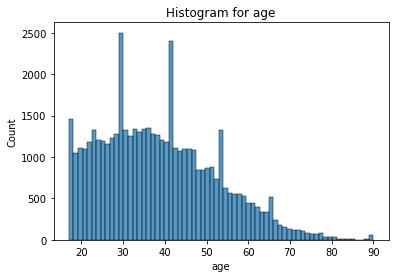

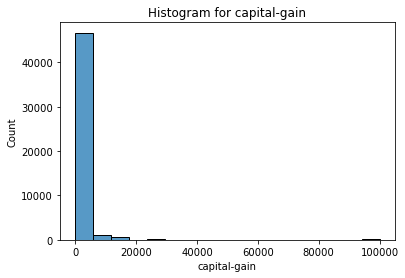

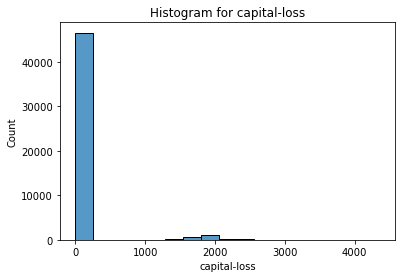

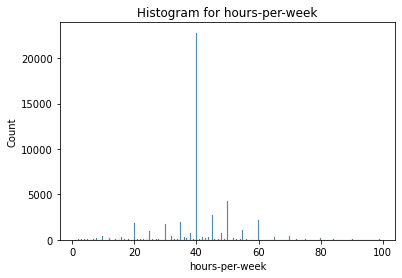

In [43]:
for i in cont_cols:
    sns.histplot(df[i])
    plt.title("Histogram for "+i)
    plt.show()

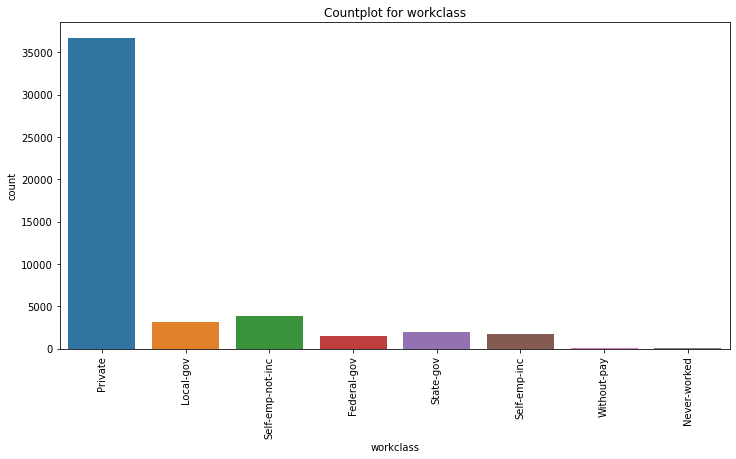

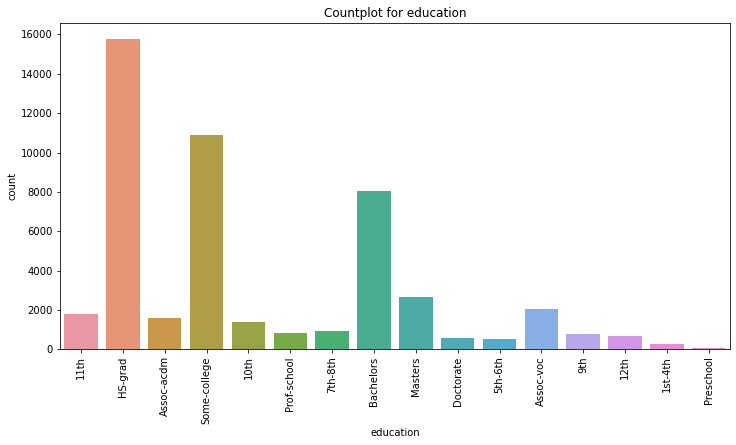

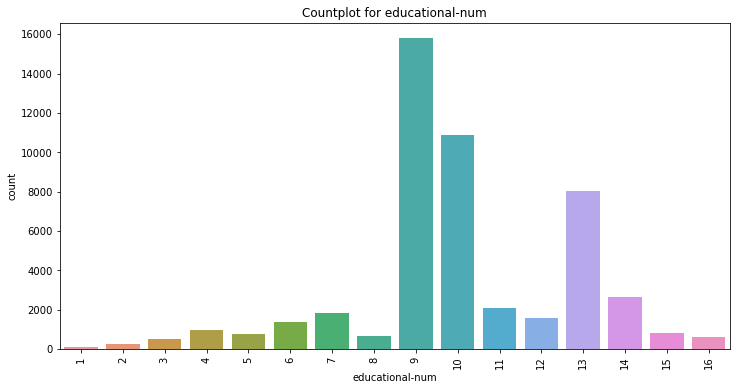

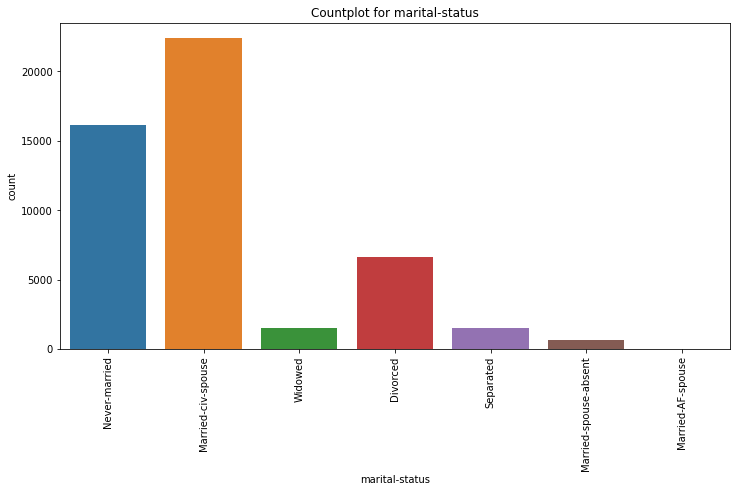

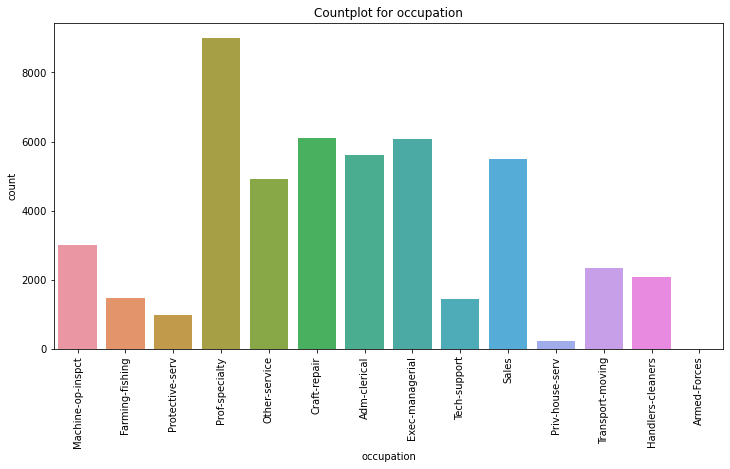

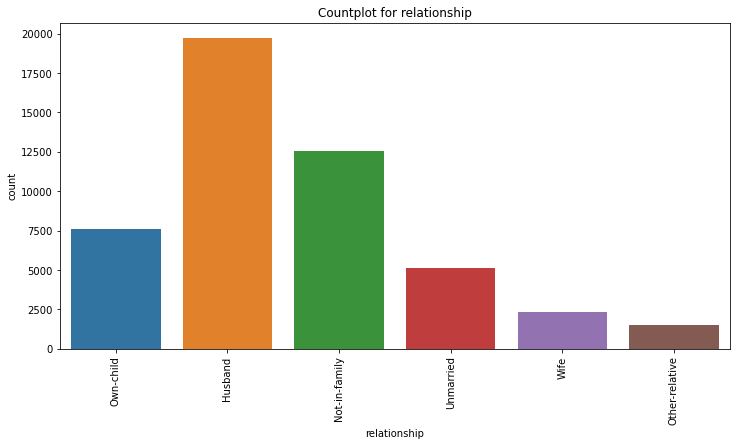

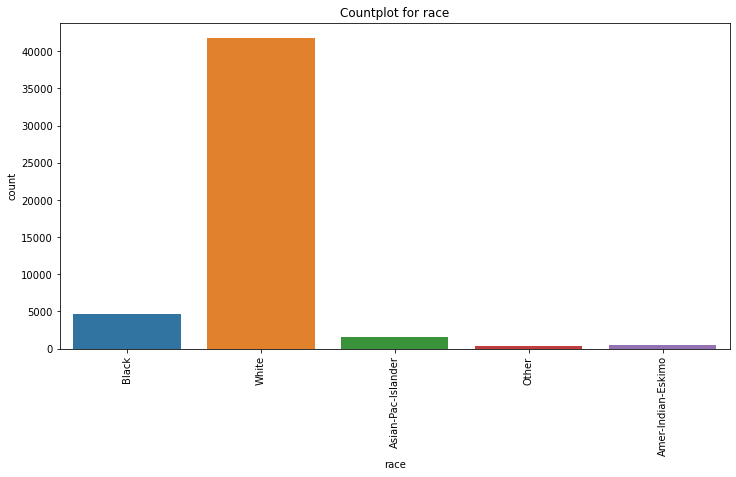

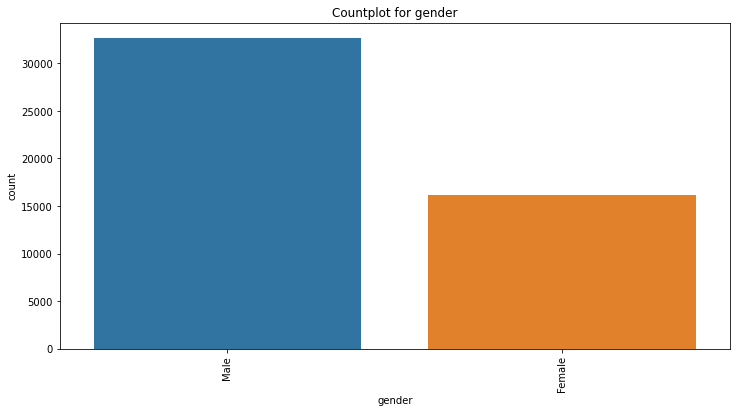

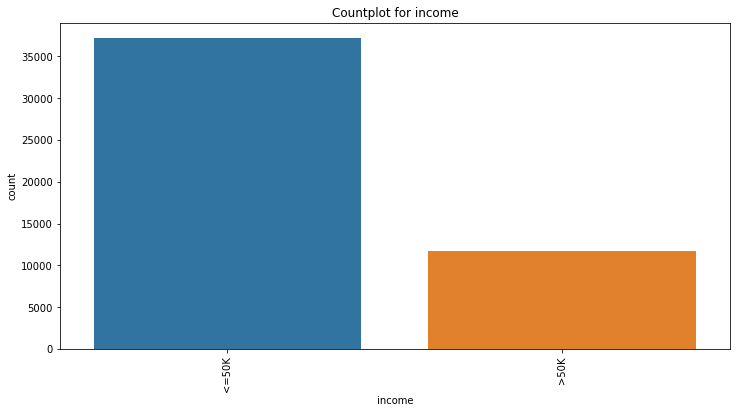

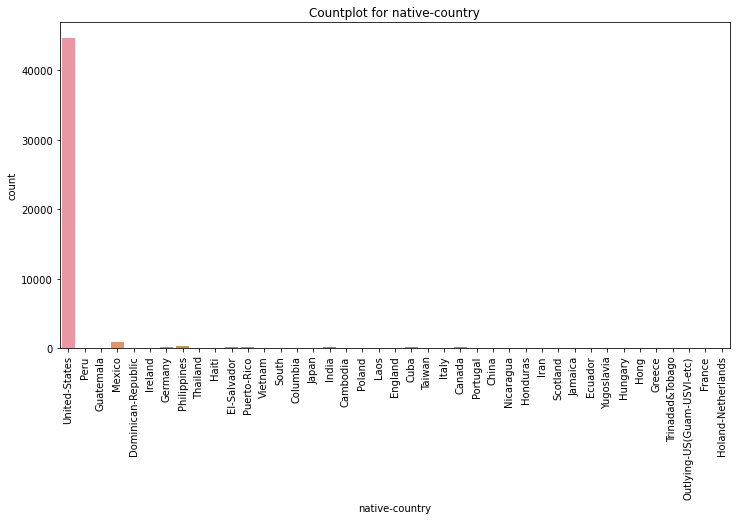

In [54]:
for i in cat_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(df[i])
    plt.title("Countplot for "+i)
    plt.xticks(rotation=90)
    plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='income', ylabel='age'>

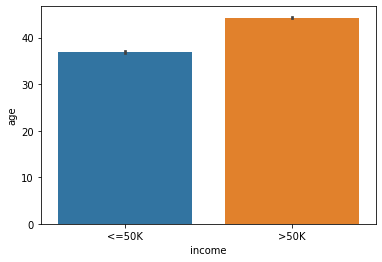

In [55]:
sns.barplot(x=df["income"],y=df["age"])

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

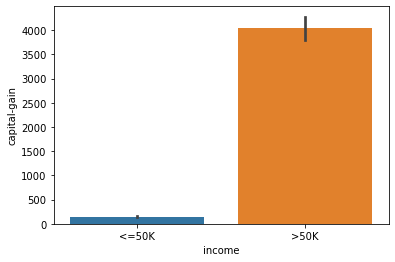

In [56]:
sns.barplot(x=df["income"],y=df["capital-gain"])

<AxesSubplot:xlabel='income', ylabel='capital-loss'>

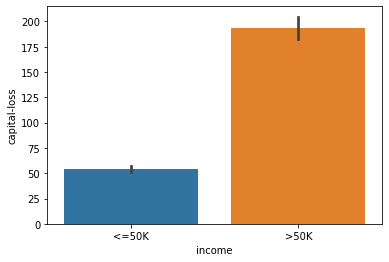

In [57]:
sns.barplot(x=df["income"],y=df["capital-loss"])

<AxesSubplot:xlabel='income', ylabel='capital-gain'>

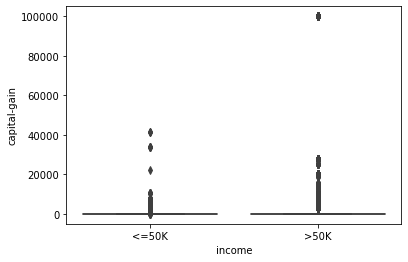

In [58]:
sns.boxplot(x=df["income"],y=df["capital-gain"])

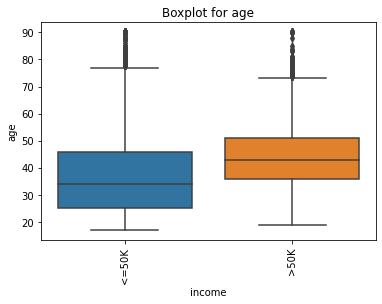

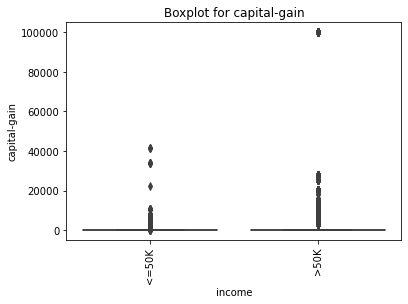

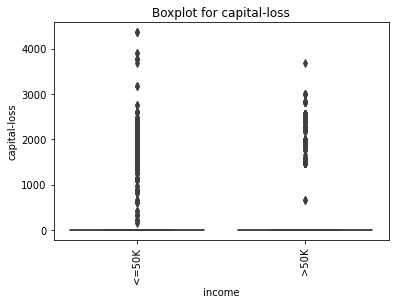

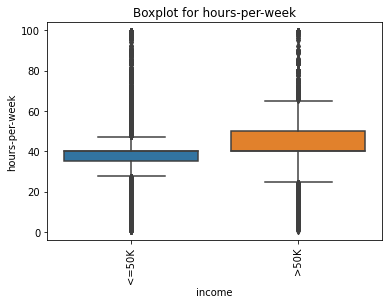

In [60]:
for i in cont_cols:
    sns.boxplot(x=df["income"],y=df[i])
    plt.title("Boxplot for "+i)
    plt.xticks(rotation=90)
    plt.show()

In [62]:
cat_cols

['workclass',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'income',
 'native-country']

<AxesSubplot:xlabel='income', ylabel='count'>

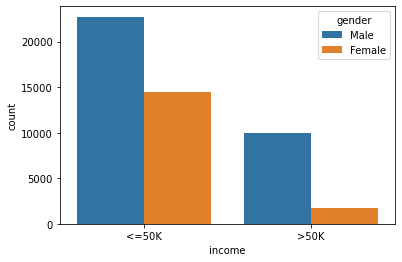

In [64]:
sns.countplot(df["income"],hue=df["gender"])

<AxesSubplot:xlabel='income', ylabel='count'>

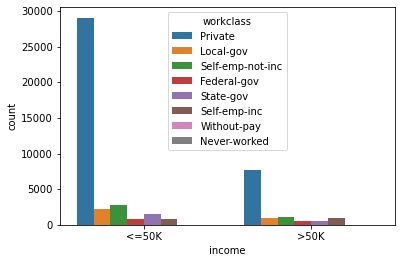

In [65]:
sns.countplot(df["income"],hue=df["workclass"])

<AxesSubplot:xlabel='income', ylabel='count'>

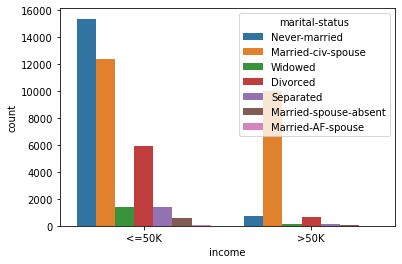

In [66]:
sns.countplot(df["income"],hue=df["marital-status"])

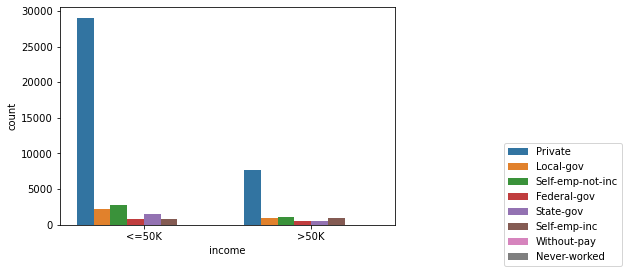

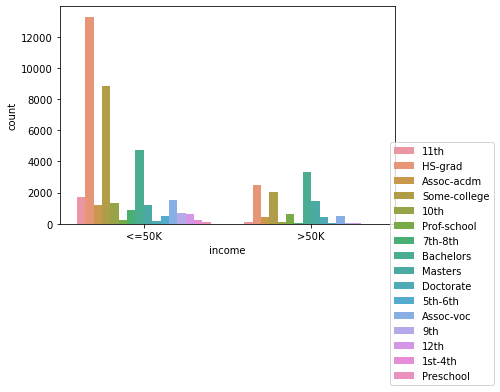

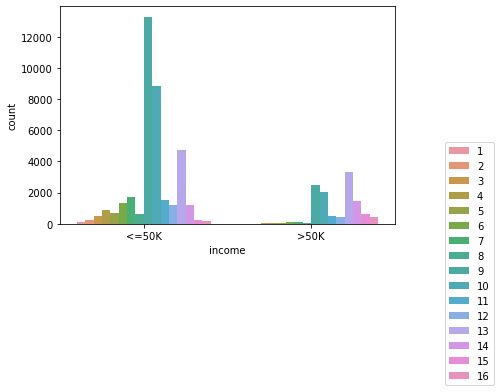

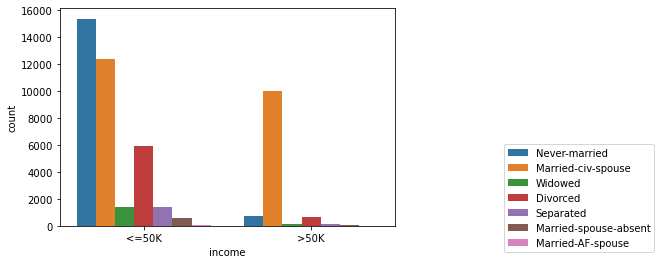

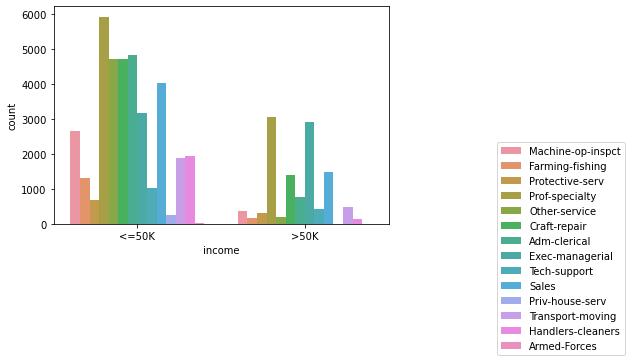

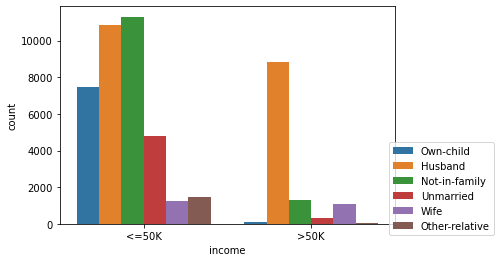

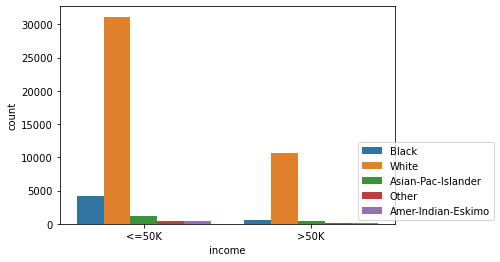

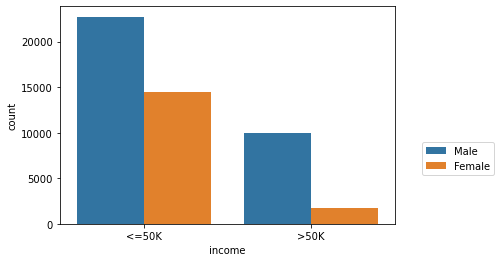

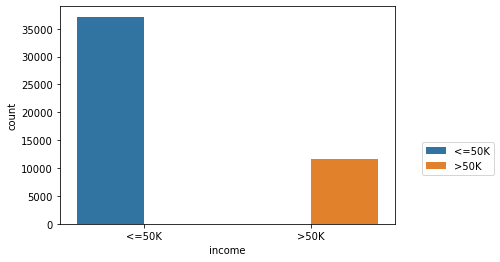

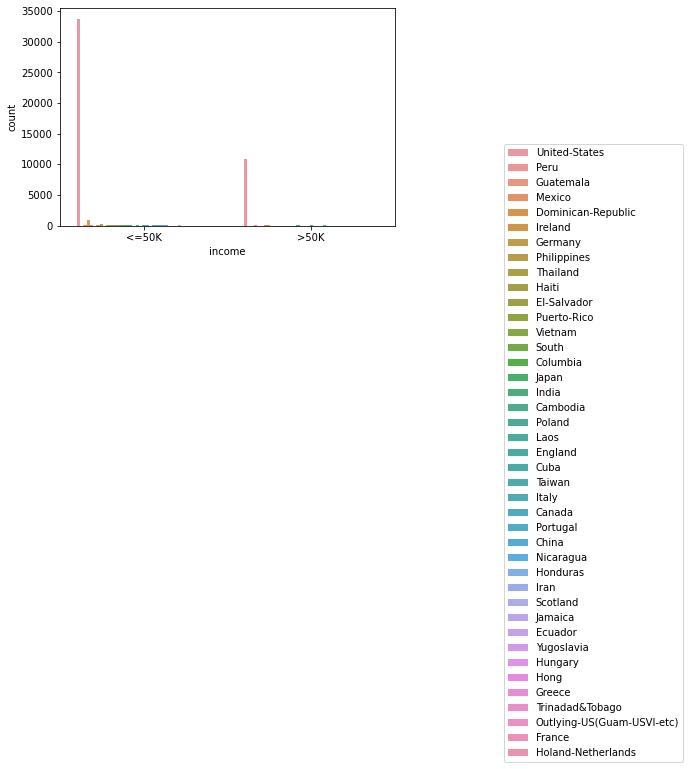

In [73]:
for i in cat_cols:
    sns.countplot(df["income"],hue=df[i])
    plt.legend(bbox_to_anchor=(1.31,0.4))
    plt.show()

In [69]:
df.columns

Index(['age', 'workclass', 'education', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [76]:
df["income"].unique()
df["target"]=df["income"].map({"<=50K":0,">50K":1})

<AxesSubplot:>

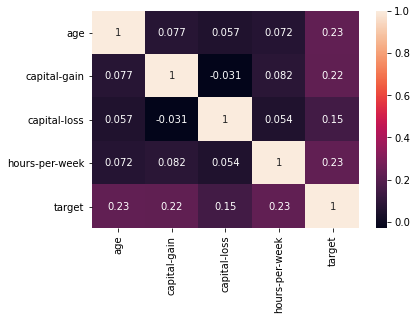

In [77]:
sns.heatmap(df[cont_cols+["target"]].corr(),annot=True)

In [79]:
df[cont_cols+["target"]].corr()

,age,capital-gain,capital-loss,hours-per-week,target
age,1.000000,0.077229,0.056944,0.071558,0.230369
capital-gain,0.077229,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,0.082157,0.054467,1.000000,0.227687
target,0.230369,0.223013,0.147554,0.227687,1.000000


In [78]:
df["target"].value_counts()

0    37155
1    11687
Name: target, dtype: int64